In [6]:
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Dense, Activation, add, Flatten, AveragePooling2D, concatenate
from keras.models import Model

from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
width = 32
height = 32

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [10]:
num_classes = 10
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [11]:
validation_images, validation_labels = x_train[:500], y_train[:500]
train_images, train_labels = x_train[500:], y_train[500:]

In [4]:

EFFICIENTNET = tf.keras.applications.efficientnet.EfficientNetB0(input_shape=(32,32,3), include_top = False, weights = 'imagenet')
EFFICIENTNET.trainable = False # 1 False # 2

In [3]:
EFFICIENTNET.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 32, 32, 3)    0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 32, 32, 3)    7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 33, 33, 3)    0           ['normalization[0][0]']          
                                                                                     

VGG Architecture

VGG + Classifier

In [7]:
model = Sequential()
model.add(EFFICIENTNET)
model.add(Flatten())
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=10, activation="softmax"))

In [15]:

model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy']) 

In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [17]:
history = model.fit(train_datagen.flow(train_images,train_labels, batch_size = 32), 
                    validation_data = validation_datagen.flow(validation_images, validation_labels, batch_size = 32),
                    epochs = 10)

Epoch 1/10
1547/1547 [==============================] - 43s 24ms/step - loss: 2.3045 - accuracy: 0.0971 - val_loss: 2.3020 - val_accuracy: 0.1000
Epoch 2/10
1547/1547 [==============================] - 36s 24ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1547/1547 [==============================] - 36s 23ms/step - loss: 2.3028 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.0800
Epoch 4/10
1547/1547 [==============================] - 36s 23ms/step - loss: 2.3030 - accuracy: 0.0966 - val_loss: 2.3030 - val_accuracy: 0.0800
Epoch 5/10
1547/1547 [==============================] - 36s 23ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3035 - val_accuracy: 0.0800
Epoch 6/10
1547/1547 [==============================] - 36s 23ms/step - loss: 2.3028 - accuracy: 0.0995 - val_loss: 2.3031 - val_accuracy: 0.1020
Epoch 7/10
1547/1547 [==============================] - 35s 23ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3039 -

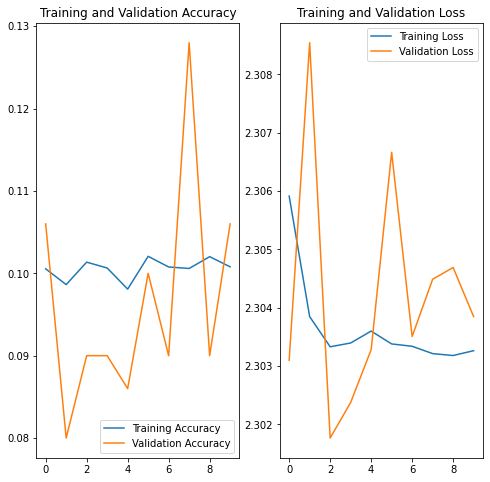

In [14]:
import matplotlib.pyplot as plt
epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()